# Boston Housing Price Prediction Workbook

Tyler Amos

MACSS 30200

In [4]:
from keras import models
from keras import layers
import pandas as pd
import random
random.seed(1234)
import numpy as np

import matplotlib.pyplot as plt
from keras import regularizers

from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

/home/tylera/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
def import_normalize():
    from keras.datasets import boston_housing
    (train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
    mean = train_data.mean(axis=0)
    train_data -= mean
    std = train_data.std(axis=0)
    train_data /= std

    test_data -= mean
    test_data /= std
    return train_data, train_targets, test_data, test_targets
    

# Set up the necessary functions

In [2]:
# k fold cross validation
def kfold_valid(model_func, k = 4, num_epochs = 10, batch = 1):
    
    train_data, train_targets, test_data, test_targets = import_normalize()
    num_val_samples = len(train_data) // k
    all_mae_histories = []
    all_mse_histories = []
    
    for i in range(k):
        print('processing fold #', i)
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
        partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples],
             train_data[(i + 1) * num_val_samples:]],
            axis=0)
        partial_train_targets = np.concatenate(
            [train_targets[:i * num_val_samples],
             train_targets[(i + 1) * num_val_samples:]],
            axis=0)

        model = model_func()
        history = model.fit(partial_train_data, partial_train_targets,
                            validation_data=(val_data, val_targets),
                            epochs=num_epochs, batch_size=batch, verbose=0)
        mae_history = history.history['val_mean_absolute_error']
        all_mae_histories.append(mae_history)
    return all_mae_histories, all_mse_histories, test_data, test_targets, model

def plot_av_mae(all_mae_histories, num_epochs):
    average_mae_history = [
        np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
    plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()
    
def evaluate_on_test(test_data, test_targets, model):
    test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
    print("TEST MSE {}".format(test_mse_score))
    print("TEST MAE {}".format(test_mae_score))
    
def run_trial(model, k, num_epochs, batch):
    scores_ab, scores_av, test_data, test_targets, model_train = kfold_valid(model, k, num_epochs, batch)
    plot_av_mae(scores_ab, num_epochs)
    evaluate_on_test(test_data, test_targets, model_train)
    

# Draft Models and Workbook


# Model 1, straight from the book, k = 4, epochs = 80

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


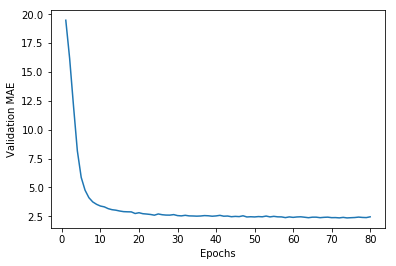

102/102 [==============================] - 0s 116us/step
TEST MSE 19.39945056391697
TEST MAE 2.8224355753730324


In [23]:

def build_model_1():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_1, 4, 80, 16)


# model 2, k = 10, epochs = 100, batch = 30

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


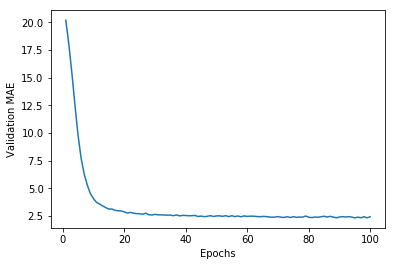

102/102 [==============================] - 0s 134us/step
TEST MSE 24.007233563591452
TEST MAE 2.9849073185640225


In [24]:
def build_model_2():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_2, 10, 100, 30)

# model 3, k = 10, epochs = 100, layer size = 80 x 2, batch = 16

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


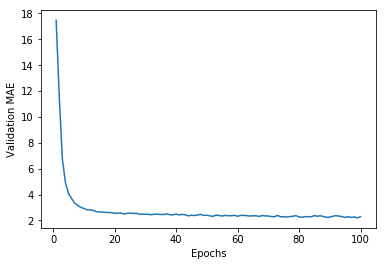

102/102 [==============================] - 0s 132us/step
TEST MSE 19.832227220722274
TEST MAE 2.8064083772547104


In [25]:
def build_model_3():
    model = models.Sequential()
    model.add(layers.Dense(80, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(80, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_3, 10, 100, 16)

# model 4, k = 10, epochs = 70, layer size = 50 x 2, 25 x 1, batch = 12

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


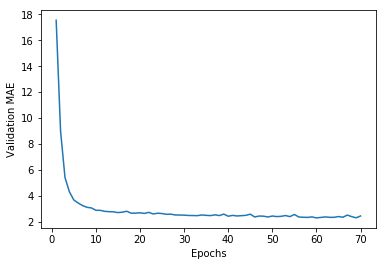

102/102 [==============================] - 0s 152us/step
TEST MSE 21.22158753638174
TEST MAE 2.7122264095381197


In [26]:
def build_model_4():
    model = models.Sequential()
    model.add(layers.Dense(50, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(25, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_4, 10, 70, 12)

# model 5, k = 10, epochs = 50, layer size = 64 x 2, 10 x 1, batch = 29

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


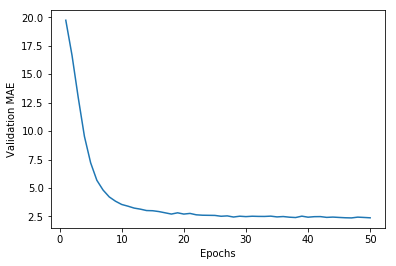

102/102 [==============================] - 0s 145us/step
TEST MSE 22.88014699898514
TEST MAE 2.90477310442457


In [27]:
def build_model_5():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_5, 10, 50, 29)

# model 6, k = 10, epochs = 120, layer size = 64 x 2, batch = 80

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


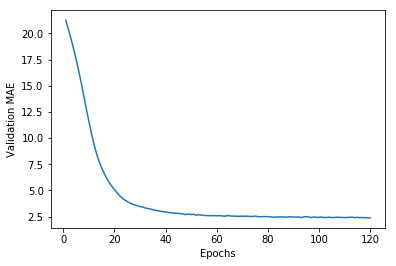

102/102 [==============================] - 0s 150us/step
TEST MSE 21.55552463905484
TEST MAE 2.855084961535884


In [28]:
def build_model_6():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_6, 10, 120, 80)

# model 7, k = 10, epochs = 40, layer size = 100 x 1, 64  x  1, batch = 30

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


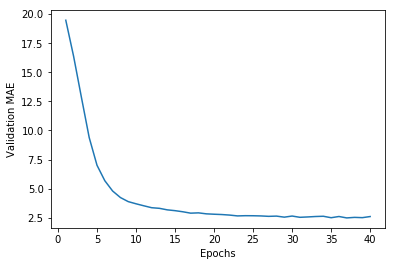

102/102 [==============================] - 0s 143us/step
TEST MSE 23.708789900237438
TEST MAE 3.0214290244906556


In [29]:
def build_model_7():
    model = models.Sequential()
    model.add(layers.Dense(100, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_7, 10, 40, 30)

# model 8, k = 10, epochs = 250, layer size = 120 x 1, batch = 20

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


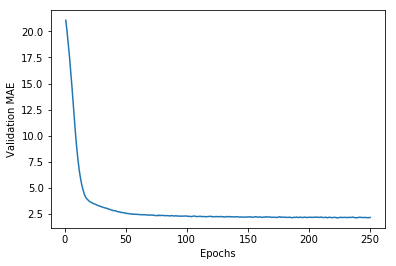

102/102 [==============================] - 0s 163us/step
TEST MSE 15.386399362601486
TEST MAE 2.4849923919228947


In [30]:
def build_model_8():
    model = models.Sequential()
    model.add(layers.Dense(120, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_8, 10, 250, 20)

# model 9, k = 10, epochs = 85, layer size = 300 x 1, batch = 10

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


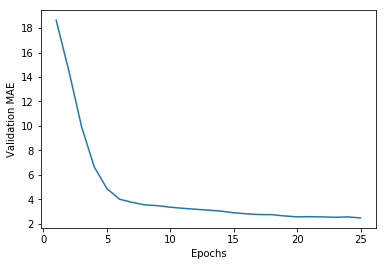

102/102 [==============================] - 0s 141us/step
TEST MSE 20.84075299431296
TEST MAE 2.9962883276097916


In [31]:
def build_model_9():
    model = models.Sequential()
    model.add(layers.Dense(300, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_9, 10, 25, 10)

# model 10, k = 10, epochs = 100, layer size = 25 x 2, batch = 10

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


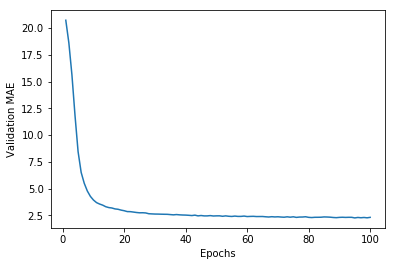

102/102 [==============================] - 0s 173us/step
TEST MSE 23.05977825089997
TEST MAE 2.9680231038261864


In [32]:
def build_model_10():
    model = models.Sequential()
    model.add(layers.Dense(25, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(25, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_10, 10, 100, 10)

# model 11, k = 10, epochs = 80, layer size = 70 x 2 with dropout at 20%, batch = 15

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


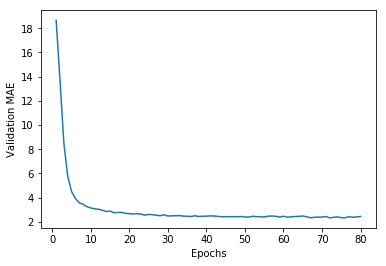

102/102 [==============================] - 0s 182us/step
TEST MSE 22.07642229865579
TEST MAE 3.147926919600543


In [33]:
def build_model_11():
    model = models.Sequential()
    
    model.add(layers.Dense(70, activation='relu',
                           input_shape=(train_data.shape[1],)))
    
    model.add(layers.Dropout(0.2))
        
    model.add(layers.Dense(70, activation='relu',
                           input_shape=(train_data.shape[1],)))
    
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

run_trial(build_model_11, 10, 80, 15)

# model 12, k = 10, epochs = 100, one layer of 200, batch size = 15

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


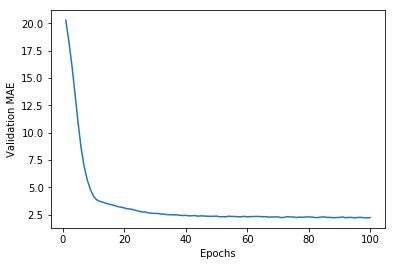

102/102 [==============================] - 0s 176us/step
TEST MSE 18.105779311236212
TEST MAE 2.598323522829542


In [34]:
def build_model_12():
    model = models.Sequential()
    model.add(layers.Dense(200, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

run_trial(build_model_12, 10, 100, 15)

# model 13, k = 10, epochs = 120, layer size = 64 x 2, batch = 80

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


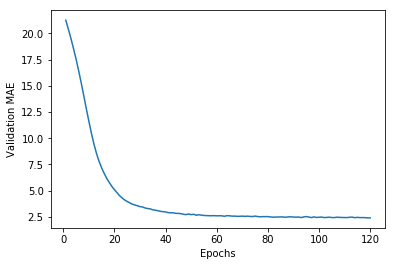

102/102 [==============================] - 0s 197us/step
TEST MSE 21.585958443435967
TEST MAE 2.8552941341026155


In [35]:
def build_model_13():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_13, 10, 120, 80)

# model 14, k = 10, epochs = 80, layer size = 500, batch = 20

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


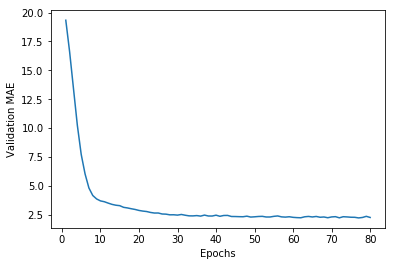

102/102 [==============================] - 0s 177us/step
TEST MSE 19.086481430951288
TEST MAE 2.7389488220214844


In [36]:
def build_model_14():
    model = models.Sequential()
    model.add(layers.Dense(500, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_14, 10, 80, 20)

# model 15, k = 10, epochs = 80, layer size = 1000 x 1, batch = 20

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


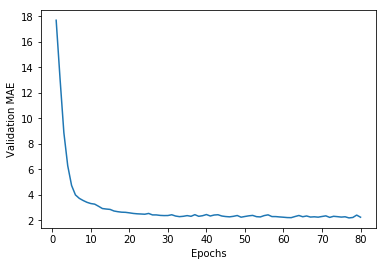

102/102 [==============================] - 0s 207us/step
TEST MSE 16.701585507860372
TEST MAE 2.5935989828670727


In [37]:
def build_model_15():
    model = models.Sequential()
    model.add(layers.Dense(1000, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_15, 10, 80, 20)

# model 16, k = 10, epochs = 80, layer size = 40 x 2, batch = 20

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


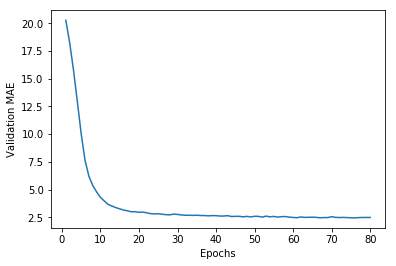

102/102 [==============================] - 0s 202us/step
TEST MSE 22.2061944101371
TEST MAE 2.7472958190768373


In [38]:
def build_model_16():
    model = models.Sequential()
    model.add(layers.Dense(40, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(40, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_16, 10, 80, 20)

# model 17, k = 10, epochs = 80, layer size = 70 x 1, 20 x 1, batch = 20

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


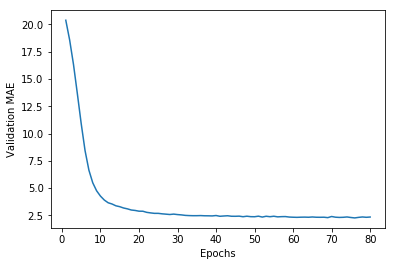

102/102 [==============================] - 0s 213us/step
TEST MSE 17.760986926508885
TEST MAE 2.611817378623813


In [39]:
def build_model_17():
    model = models.Sequential()
    model.add(layers.Dense(70, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(20, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_17, 10, 80, 20)

# model 18, k = 10, epochs = 80, layer size = 70 x 1, 50 x 1, batch = 20

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


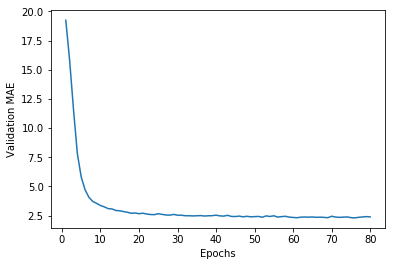

102/102 [==============================] - 0s 232us/step
TEST MSE 18.11853535970052
TEST MAE 2.6425045331319175


In [40]:
def build_model_18():
    model = models.Sequential()
    model.add(layers.Dense(70, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(50, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_18, 10, 80, 20)

# model 19, k = 10, epochs = 70, layer size = 120 x 1, 30 x 1, batch = 20

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


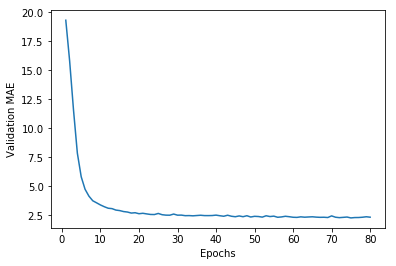

102/102 [==============================] - 0s 220us/step
TEST MSE 19.01408296472886
TEST MAE 2.654231417412851


In [41]:
def build_model_19():
    model = models.Sequential()
    model.add(layers.Dense(120, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(30, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_19, 10, 80, 20)

# model 20, k = 10, epochs = 70, layer size = 10 x 4, batch = 20

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


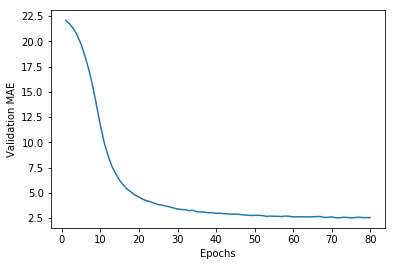

102/102 [==============================] - 0s 204us/step
TEST MSE 20.770064110849418
TEST MAE 3.190161901361802


In [42]:
def build_model_20():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(10, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(10, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(10, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_20, 10, 80, 20)

# model 21, k = 10, epochs = 70, layer size = 70 x 1, 30 x 1, batch = 15

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


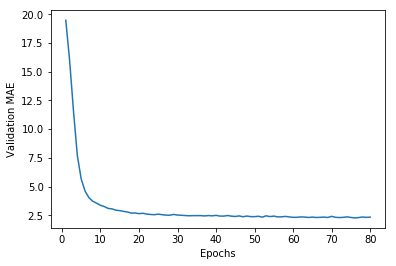

102/102 [==============================] - 0s 215us/step
TEST MSE 17.83884115780101
TEST MAE 2.5789029644984827


In [43]:
def build_model_21():
    model = models.Sequential()
    model.add(layers.Dense(70, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(30, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_21, 10, 80, 15)

# model 22, k = 10, epochs = 180, layer size = 64 x 2, 10 x 1, batch = 29

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


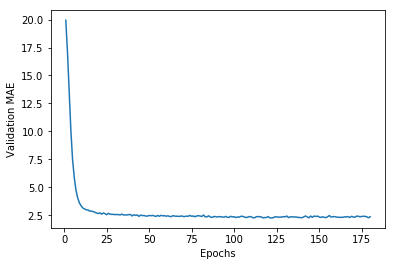

102/102 [==============================] - 0s 60us/step
TEST MSE 12.956267861758962
TEST MAE 2.48078514547909


In [6]:
def build_model_22():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_22, 10, 180, 29)

# model 23, k = 10, epochs = 350, layer size = 120, batch = 20

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


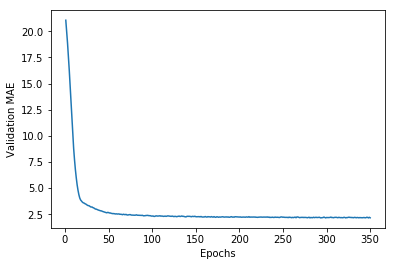

102/102 [==============================] - 0s 242us/step
TEST MSE 14.61182777554381
TEST MAE 2.4897020377364814


In [45]:
def build_model_23():
    model = models.Sequential()
    model.add(layers.Dense(120, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_23, 10, 350, 20)

# model 24, k = 10, epochs = 400, layer size = 150, batch = 15

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


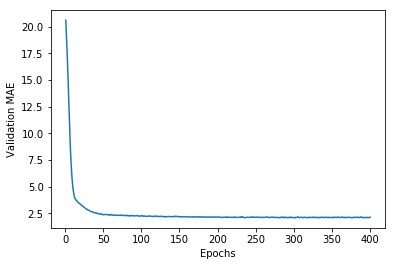

102/102 [==============================] - 0s 267us/step
TEST MSE 12.699727825089997
TEST MAE 2.4215310508129644


In [46]:
def build_model_24():
    model = models.Sequential()
    model.add(layers.Dense(150, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_24, 10, 400, 15)

# model 25, k = 10, epochs = 250, layer size = 90, batch = 15

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


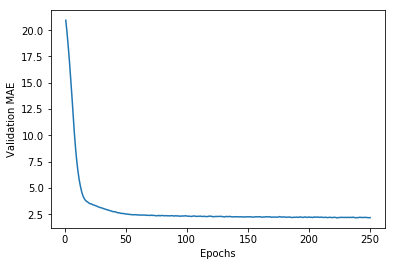

102/102 [==============================] - 0s 243us/step
TEST MSE 17.25736296410654
TEST MAE 2.5071524077770757


In [47]:
def build_model_25():
    model = models.Sequential()
    model.add(layers.Dense(90, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_25, 10, 250, 15)

# model 26, k = 10, epochs = 250, layer size = 75, batch = 10

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


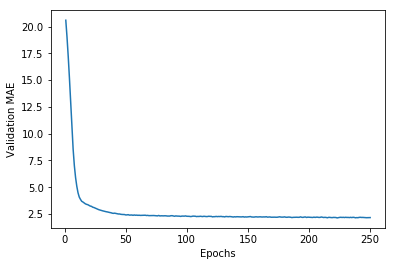

102/102 [==============================] - 0s 278us/step
TEST MSE 16.934310314702053
TEST MAE 2.578079298430798


In [48]:
def build_model_26():
    model = models.Sequential()
    model.add(layers.Dense(75, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_26, 10, 250, 10)

# model 27, k = 10, epochs = 300, layer size = 145, batch = 10

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


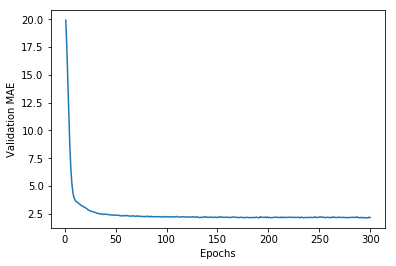

102/102 [==============================] - 0s 290us/step
TEST MSE 14.609523100011488
TEST MAE 2.5552938966190113


In [49]:
def build_model_27():
    model = models.Sequential()
    model.add(layers.Dense(145, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_27, 10, 300, 10)

# model 28, k = 10, epochs = 500, layer size = 150, batch = 15

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


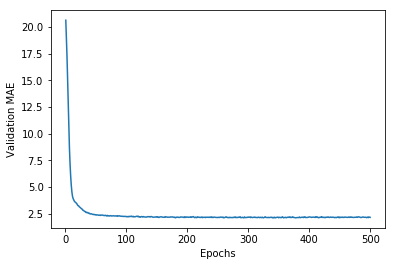

102/102 [==============================] - 0s 247us/step
TEST MSE 12.939417969946767
TEST MAE 2.361766974131266


In [50]:
def build_model_28():
    model = models.Sequential()
    model.add(layers.Dense(150, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

run_trial(build_model_28, 10, 500, 15)

# model 29, k = 10, epochs = 60, layer size = 150, batch = 12

In [54]:
def build_model_29():
    model = models.Sequential()
    model.add(layers.Dense(150, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [ ]:
run_trial(build_model_29, 10, 60, 12)

# Best Model, 22

In [11]:
train_data, train_targets, test_data, test_targets = import_normalize()

model = build_model_22()
history = model.fit(train_data, train_targets,
                            epochs=120, batch_size=29, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print("TEST MSE {}".format(test_mse_score))
print("TEST MAE {}".format(test_mae_score))

102/102 [==============================] - 0s 2ms/step
TEST MSE 14.823166641534543
TEST MAE 2.504025057250378
